#### https://online.stat.psu.edu/stat505/lesson/4

PDF of **univariate normal distribution** is:
$$
f(x) = \frac{1}{\sqrt{2 \pi} \sigma} exp(-\frac{1}{2 \sigma^2}(x-\mu)^2)
$$

and X follows normal distribution $N(\mu, \sigma^2)$

PDF of **multivariate normal distribution** is:
$$
f(x) = (\frac{1}{\sqrt{2\pi}})^p |\Sigma|^{-\frac{1}{2}} exp(-\frac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu))
$$

and X follows multivarita normal distribution $N(\mu, \Sigma)$

Some things to note about the multivariate normal distribution:
<ol>
    <li>Inside the exponent is a quadratic form $(x-\mu)^T \Sigma^{-1} (x-\mu)$. This particular quadratic form is also called the squared Mahalanobis distance between x and $\mu$</li>
    <li>If the variables are independent, $\Sigma$ is a diagonal matrix</li>
    <li>We can construct **Y** as a linear combination of the elements of a multivariate normal random variable $Y = \sum_{i=1}^p c_j X_j = X c$. In this case, Y is univariate normal $N(\mu c, c^T \Sigma c)$</li>
    <li>Each single variable has a univarite normal distribution; Any subset of the variables also has a multivariate normal distribution</li>
    <li>Any conditional distribution is a multivariate distribution</li>
</ol>

#### Bivariate Normal Distribution

\begin{bmatrix} X_1 & X_2 \end{bmatrix}

mean vector is
$$
\begin{bmatrix} \mu_1 & \mu_2 \end{bmatrix}
$$

cov matrix is
$$
\begin{bmatrix} \sigma_1^2 & \rho\sigma_1\sigma_2 \\ \rho \sigma_1 \sigma_2 & \sigma_2^2 \end{bmatrix}
$$

determinant is
$$
|\Sigma| = (1-\rho^2) \sigma_1^2 \sigma_2^2
$$

Inverse is 
$$
\Sigma^{-1} = \frac{1}{(1-\rho^2)\sigma_1^2 \sigma_2^2} \begin{bmatrix} \sigma_2^2 & -\rho\sigma_1\sigma_2 \\ -\rho \sigma_1 \sigma_2 & \sigma_1^2 \end{bmatrix}
$$

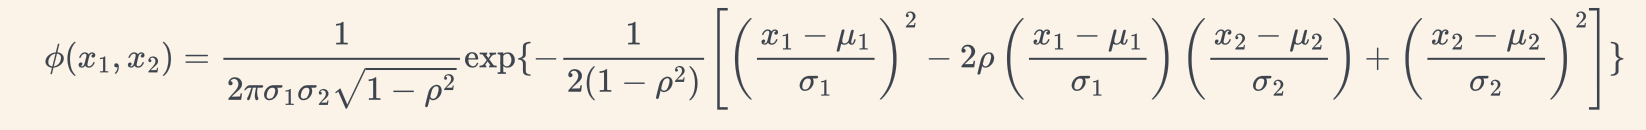

In [3]:
from IPython.display import Image
Image("bivariate_normal_pdf.png", width=600, height=600)

In [18]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
from matplotlib import pyplot as plt

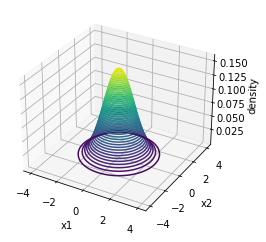

In [58]:
rv = multivariate_normal(mean=[0,0], cov=np.matrix([[1,0],[0,1]]))
x = np.linspace(-4, 4, 50)
y = np.linspace(-4, 4, 50)
X, Y = np.meshgrid(x, y)
Z = [[rv.pdf((X[i,j], Y[i,j])) for i in range(X.shape[0])] for j in range(X.shape[1])]
Z = np.array(Z)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('density');

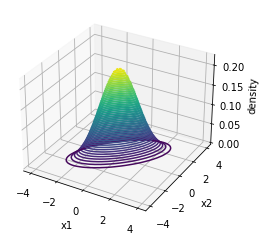

In [61]:
rv = multivariate_normal(mean=[0,0], cov=np.matrix([[1,0.7],[0.7,1]]))
x = np.linspace(-4, 4, 50)
y = np.linspace(-4, 4, 50)
X, Y = np.meshgrid(x, y)
Z = [[rv.pdf((X[i,j], Y[i,j])) for i in range(X.shape[0])] for j in range(X.shape[1])]
Z = np.array(Z)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('density');

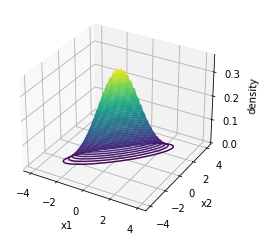

In [62]:
rv = multivariate_normal(mean=[0,0], cov=np.matrix([[1,0.9],[0.9,1]]))
x = np.linspace(-4, 4, 50)
y = np.linspace(-4, 4, 50)
X, Y = np.meshgrid(x, y)
Z = [[rv.pdf((X[i,j], Y[i,j])) for i in range(X.shape[0])] for j in range(X.shape[1])]
Z = np.array(Z)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('density');

#### Exponent of Bivariate Normal distribution 

$$
(x-\mu)^T \Sigma^{-1} (x-\mu)
$$

In [101]:
def make_func(mean, covmat):
    def func(x1, x2):
        arr = np.matrix([x1,x2]).T
        ret = (arr - mean).T @ np.linalg.inv(covmat) @ (arr - mean)
        return ret[0,0]
    return func

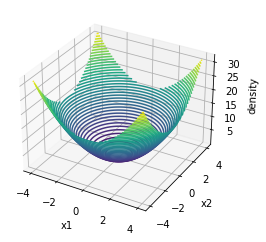

In [105]:
mean = np.matrix([0,0]).T
covmat = np.matrix([[1,0],[0,1]])
f = make_func(mean, covmat)

x = np.linspace(-4, 4, 50)
y = np.linspace(-4, 4, 50)
X, Y = np.meshgrid(x, y)
Z = [[f(X[i,j], Y[i,j]) for i in range(X.shape[0])] for j in range(X.shape[1])]
Z = np.array(Z)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('density');

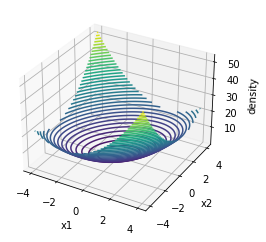

In [108]:
mean = np.matrix([0,0]).T
covmat = np.matrix([[1,0.4],[0.4,1]])
f = make_func(mean, covmat)

x = np.linspace(-4, 4, 50)
y = np.linspace(-4, 4, 50)
X, Y = np.meshgrid(x, y)
Z = [[f(X[i,j], Y[i,j]) for i in range(X.shape[0])] for j in range(X.shape[1])]
Z = np.array(Z)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('density');

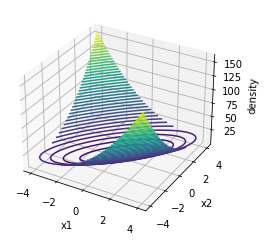

In [111]:
mean = np.matrix([0,0]).T
covmat = np.matrix([[1,0.8],[0.8,1]])
f = make_func(mean, covmat)

x = np.linspace(-4, 4, 50)
y = np.linspace(-4, 4, 50)
X, Y = np.meshgrid(x, y)
Z = [[f(X[i,j], Y[i,j]) for i in range(X.shape[0])] for j in range(X.shape[1])]
Z = np.array(Z)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('density');

<ol>
    <li>Contour plot, for any specific value, the density is the same</li>
    <li>It's squared Mahalanobis Distance $d_j^2 = (x_j - \bar{x})^T \Sigma^{-1} (x_j - \bar{x})$</li>
    <li>As the value increases, the value of density decreases.</li>
    <li>The variable $d^2$ has a chi-square distribution with p degrees of freedom</li>
</ol>

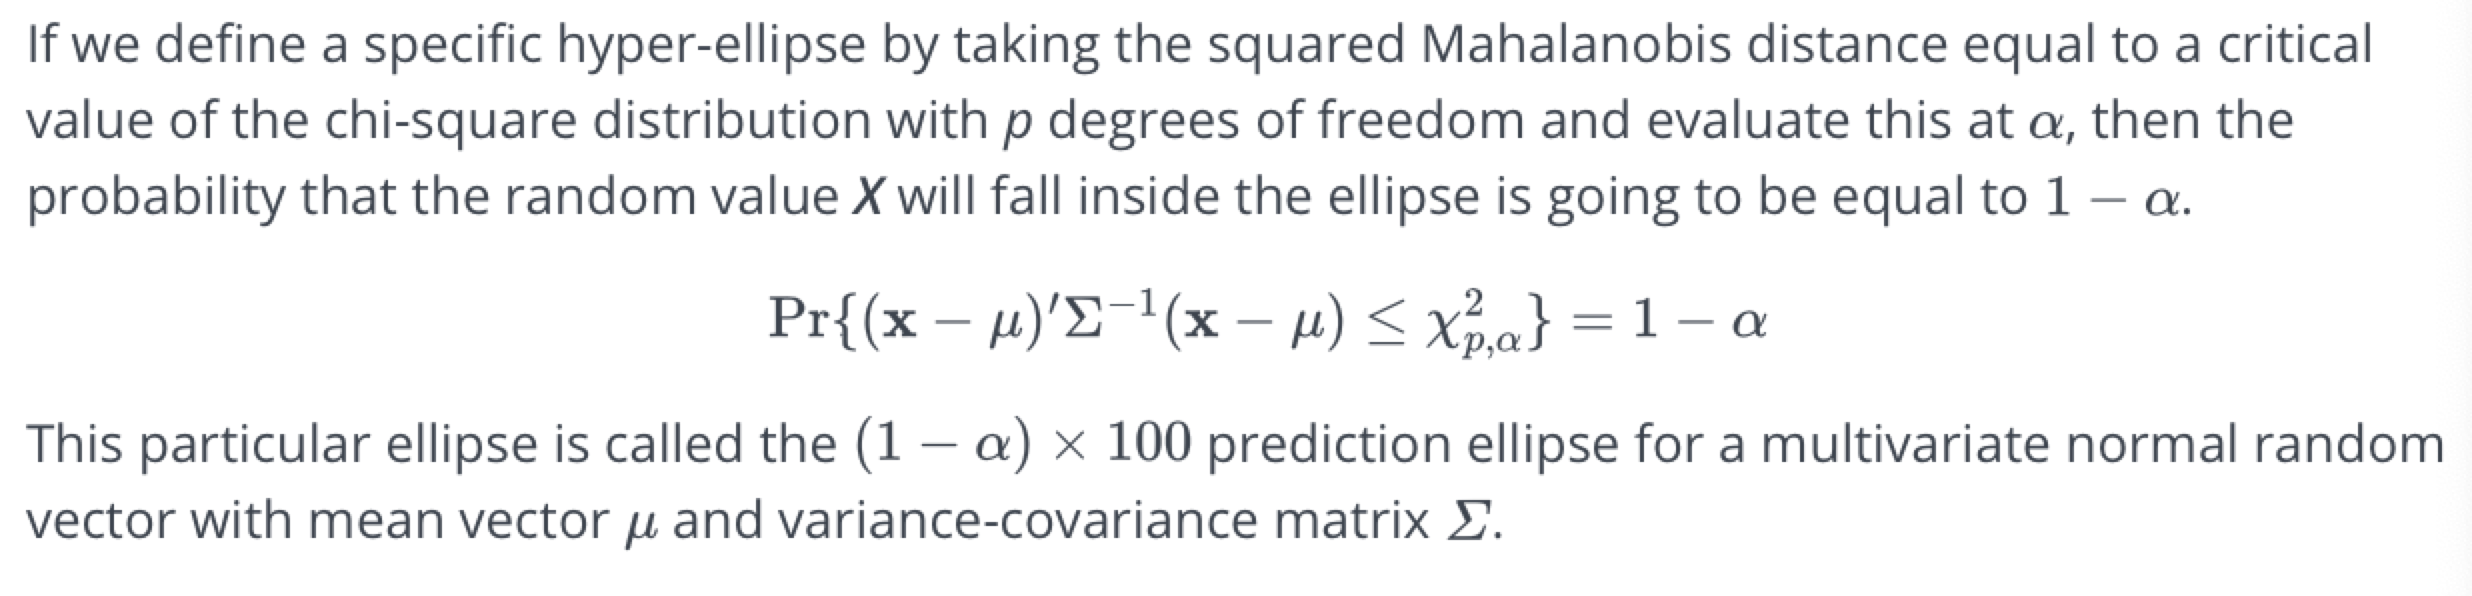

In [112]:
Image("exponent_critical_value.png", width=600, height=600)

#### QQ Plot for Evaluating Multivariate Normality

The variable $d^2 = (x-\mu)^T \Sigma^{-1} (x-\mu)$ has a chi-square distritbuion with p degrees of freedom

In [113]:
df = pd.read_table("nutrient.txt", delim_whitespace=True, header=None, index_col=0)
df.columns = ['calcium', 'iron', 'protein', 'vitamin A', 'vitamin C']

In [115]:
mu = df.mean()

In [120]:
(df - mu).shape

(737, 5)

In [122]:
df.cov().shape

(5, 5)

In [125]:
d_squared = np.diag((df - mu) @ df.cov() @ (df - mu).T)

In [128]:
from scipy import stats
from scipy.stats import chi2

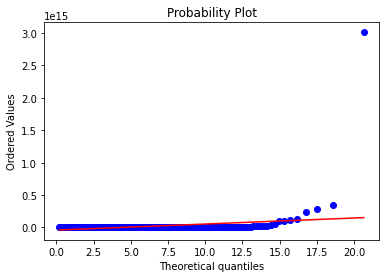

In [133]:
res = stats.probplot(d_squared, dist=chi2, sparams=(5), plot=plt)

#### Eigenvalues and Eigenvectors

We'd like to describe the shape of this ellipse mathematically so that we can understand it better.

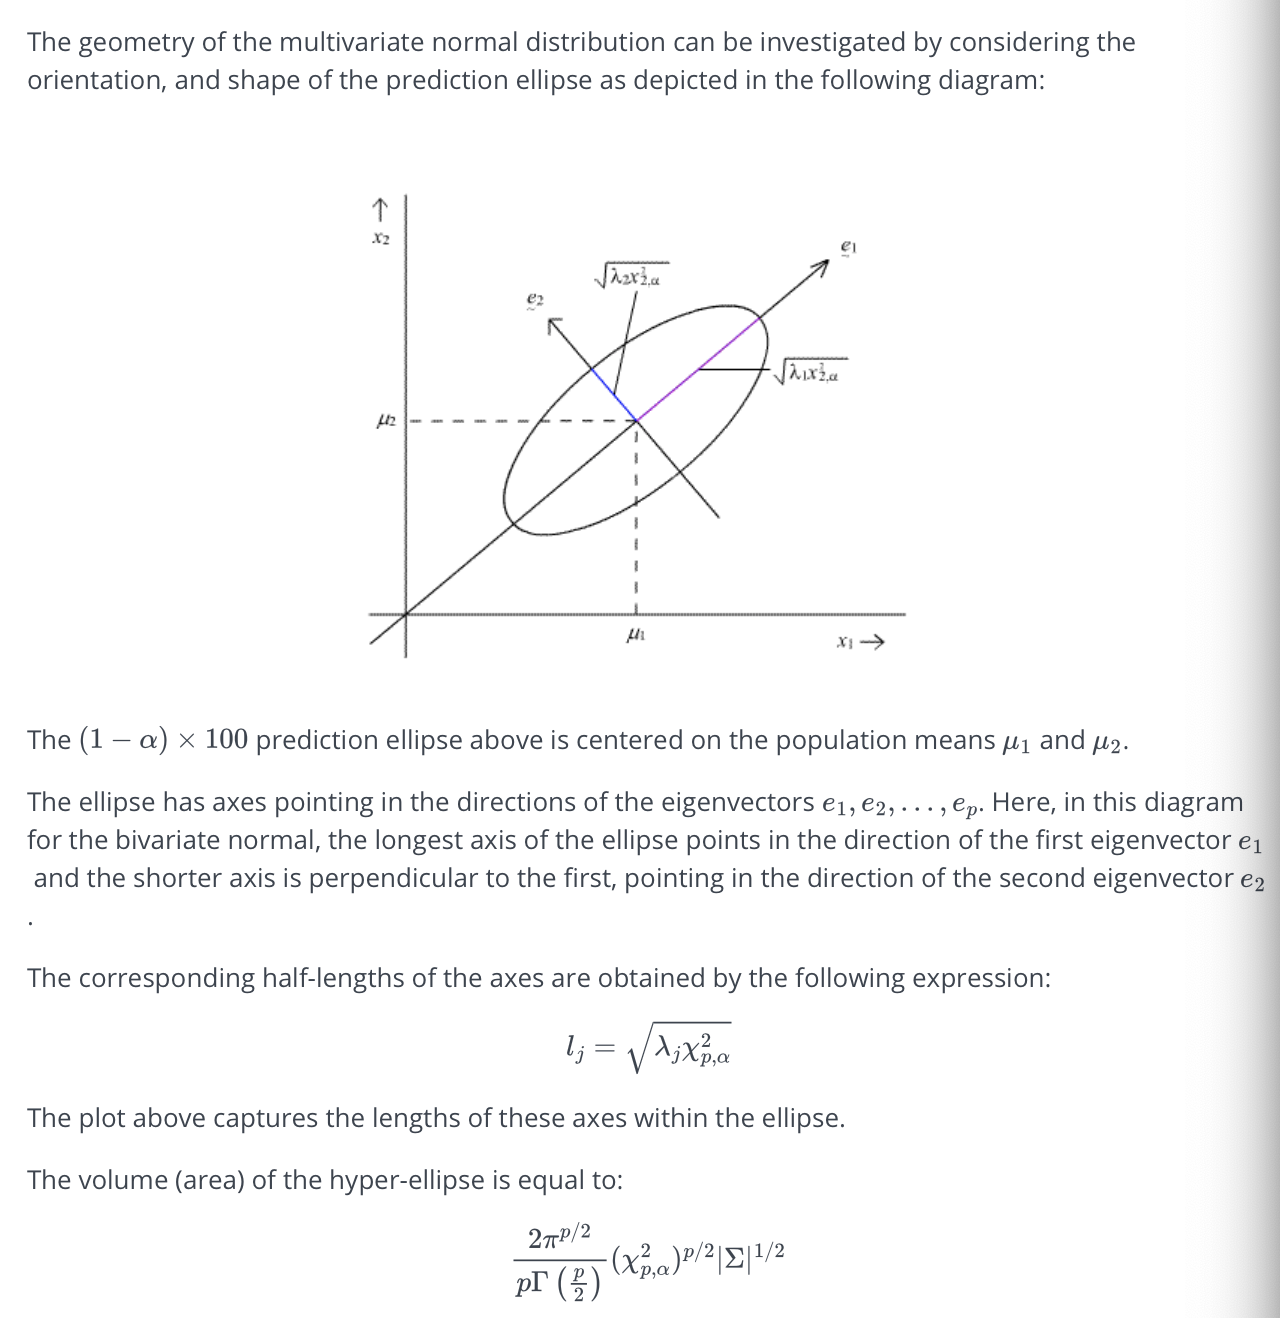

In [134]:
Image("ellipse_evalue.png", width=600, height=600)

2 properties: the total variation is $\sum_{i=1}^p s_j^2 = \sum_{i=1}^p \lambda_i$, and the generalized variance is $|\Sigma| = \prod_{i=1}^p \lambda_i$

The volume of the hyper-ellipse is proportional to the square root of the generalized variance

#### Example

In [147]:
df = pd.read_csv("wechsler.txt", delim_whitespace=True, header=None, index_col=0)

In [149]:
df.columns = ['info','sim','arith','pic']

In [150]:
df.describe()

,info,sim,arith,pic
count,37.000000,37.000000,37.000000,37.000000
mean,12.567568,9.567568,11.486486,7.972973
std,3.387399,3.476433,3.330179,1.921898
min,6.000000,3.000000,5.000000,3.000000
25%,10.000000,7.000000,9.000000,7.000000
50%,13.000000,10.000000,11.000000,8.000000
75%,15.000000,12.000000,14.000000,9.000000
max,19.000000,18.000000,17.000000,11.000000


In [151]:
df.cov()

,info,sim,arith,pic
info,11.474474,9.085586,6.382883,2.071321
sim,9.085586,12.085586,5.938438,0.543544
arith,6.382883,5.938438,11.090090,1.791291
pic,2.071321,0.543544,1.791291,3.693694


In [153]:
evalues, evectors = np.linalg.eig(df.cov())

In [177]:
indexes = np.argsort(evalues) # returns indices that would sort the array
indexes = np.flip(indexes) # from big to small

In [178]:
evalues[indexes]

array([26.24527763,  6.25536631,  3.9315528 ,  1.9116471 ])

In [180]:
evectors[:, indexes] # sort the columns

array([[ 0.60574672, -0.21764727,  0.46050284,  0.61125912],
       [ 0.60476183, -0.49581169, -0.31967589, -0.53501516],
       [ 0.50513365,  0.79464524, -0.33492631,  0.03468877],
       [ 0.11033602,  0.2744802 ,  0.75734327, -0.58216643]])

(1) sum of evalues == total variation

In [181]:
sum(evalues)

38.343843843843835

In [182]:
sum(np.diag(df.cov()))

38.343843843843835

(2) determinant == prod of evalues

In [183]:
np.linalg.det(df.cov())

1233.8880356050481

In [184]:
np.prod(evalues)

1233.888035605048

(3) The biggest eigenvalue is 26.245, and the corresponding vector is [0.606, 0.605, 0.505, 0.110]

Evector tell me how to make a linear combination of x-variables by assigning given weights. This LC variable has variance equal to evalue.

In [193]:
res = df @ np.matrix([0.60574672, 0.60476183, 0.50513365, 0.11033602]).T

In [194]:
np.var(res, ddof=1)

0    26.245278
dtype: float64

(4) Let's consider the shape of the 95% prediction ellipse formed by this multivariate normal distribution

In this example, we have 4 features, i.e. p=4; the degree of freedom of the chi-square distribution (recall $d^2$) is therefore 4.

In [196]:
chi2.ppf(q=0.95, df=4)

9.487729036781154

$$
l_1 = \sqrt{\lambda_1 \chi_{4,0.05}^2}
$$

In [197]:
np.sqrt(26.245278 * 9.487729036781154)

15.779990055731771

For another 3 directions, they are 7.705, 6.108, 4.260

(5) And the volume of the hyper-ellipse

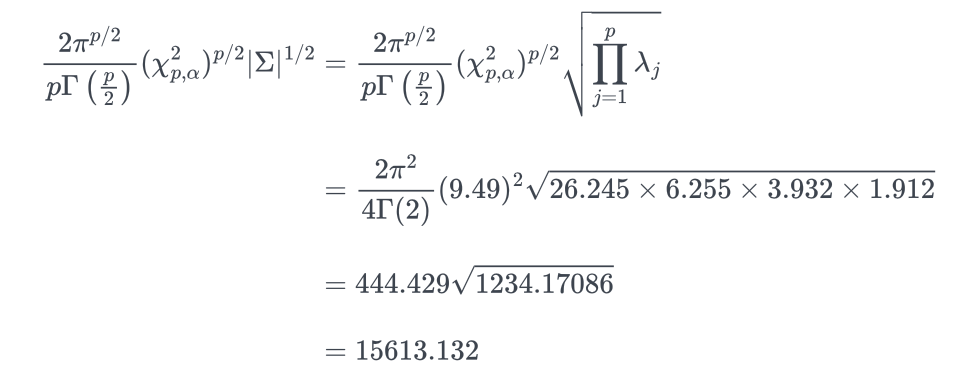

In [198]:
Image("ellipse_volume.png", width=600, height=600)